In [1]:
import numpy as np
import sympy
from matplotlib import rcParams

rcParams["text.usetex"] = True
sympy.init_printing(forecolor="White", use_latex="svg", scale=1)

In [2]:
def convolve(f, g, x, lower_limit, upper_limit):
    y = sympy.Symbol('y')
    h = g.subs(x, x - y)
    return sympy.integrate(f * h, (y, lower_limit, upper_limit))

'f = '

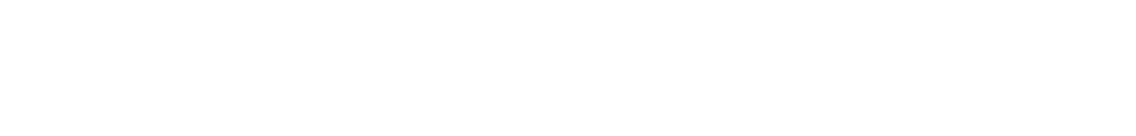

In [3]:
N = 3

# time variable
t = sympy.symbols("t")

# helper constants
ones = sympy.Matrix([[1]*N], shape=(N, 1)).T

# state pool sizes
s = sympy.symbols(" ".join([f"s_{i+1}" for i in range(N)]))
S_inv = sympy.Matrix.diag(s)**(-1)
s = sympy.Matrix([s], shape=(N, 1)).T

# flux variables
v = sympy.symbols(" ".join([f"v_{i}" for i in range(N+1)]))

# internal flux matrix
V = sympy.Matrix([
    [0, v[1], 0],
    [0, 0, v[2]],
    [0, 0, 0]
])

# external flux matrix
Y = sympy.Matrix([[v[0], 0, 0]], shape=(N, 1))

M = S_inv @ (V.T - sympy.Matrix.diag(*(ones.T @ V + Y)))
f = sympy.simplify((M * t).exp() @ ones)

display("f = ", f)

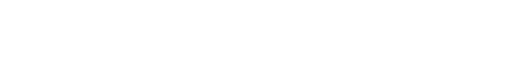

In [4]:
(v[0]/s[0])*f[1] + sympy.derive_by_array(f[1], t)

In [5]:
sympy.simplify(f[1] + sympy.derive_by_array(f[1], t) * s[0] / v[0])

In [6]:
m = sympy.simplify(f[2] + sympy.derive_by_array(f[2], t) * s[0] / v[0])

sympy.simplify(m + sympy.derive_by_array(m, t) * s[1] / v[1])

In [7]:
sympy.simplify(f[2] + sympy.derive_by_array(f[2], t) * (s[0] / v[0] + s[1] / v[1]) + sympy.derive_by_array(sympy.derive_by_array(f[2], t), t) * s[0] / v[0] * s[1] / v[1])

In [8]:
n = 2
t = sympy.symbols("t")
eta = sympy.symbols(" ".join([f"η_{i}" for i in range(n)]))
tau = sympy.symbols(" ".join([f"τ_{i}" for i in range(n)]))


G = sympy.Matrix(np.zeros((n, n)))
for i in range(0, n):
    G[i, i] = -1 / eta[i]
#for i in range(1, n):
#    G[i, i-1] = 1 / eta[i]
g0 = sympy.Matrix([1 / tau[0]] + [0] * (n - 1))

M = sympy.Matrix(np.zeros((n, n)))
for i in range(0, n):
    M[i, i] = -1 / tau[i]
for i in range(1, n):
    M[i, i-1] = 1 / tau[i]
ones = sympy.Matrix([[1]*n], shape=(n, 1)).T

f = (M*t).exp() @ ones + (G - M).inv() @ ((G*t).exp() - (M*t).exp()) @ g0

f_decov = f - G.inv() @ sympy.derive_by_array(f, [t])[0]

In [9]:
params = {eta[0]: 1.0, eta[1]: 2.0, tau[0]: 4.0, tau[1]: 8.0}

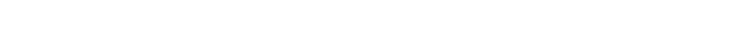

In [10]:
display(sympy.simplify(f.subs(params)))

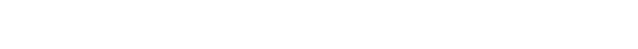

In [11]:
display(sympy.simplify(f_decov.subs(params)))

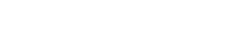

In [12]:
f_clean = (M*t).exp() @ ones
display(sympy.simplify(f_clean.subs(params)))